# Exercise No. 17
## Credit Card Data Clustering
#### 2019 June 25 | Cameron.Cn
Data from | https://www.kaggle.com/arjunbhasin2013/ccdata/

In [1]:
# bringing in our libraries
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline

In [2]:
# finding our file
location = "../AdvData_DATASETS/CC_GENERAL.csv"
cred = pd.read_csv(location) # reading the file
cred.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
print(cred.count())
print('---------')

CUST_ID                             8950
BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8949
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8637
PRC_FULL_PAYMENT                    8950
TENURE                              8950
dtype: int64
---------


In [4]:
cred.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

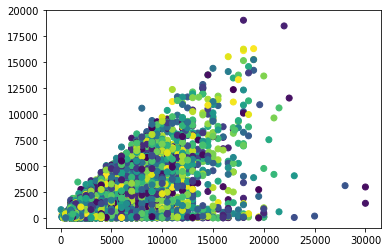

In [5]:
# plotting the Balance on a card (Y) by the credit limit (X)
rng = np.random.RandomState(91)
colors = rng.rand(8950)
plt.scatter(cred['CREDIT_LIMIT'],cred['BALANCE'], c=colors)

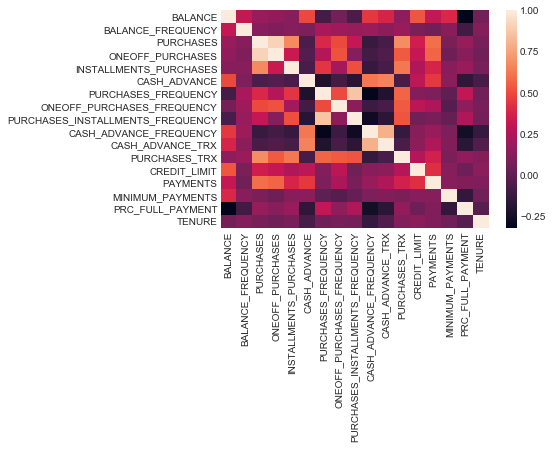

In [6]:
# simple heatmap for corr (more interesting visually than a corr table)
plt.style.use('seaborn-dark')
sns.heatmap(cred.corr())

In [7]:
# theres one spot missing! how? 
cred.loc[cred['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [55]:
cred['CREDIT_LIMIT'].fillna('1000', inplace=True)

In [56]:
print(cred.isnull().sum())
print('------')
print(cred.mean())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
------
BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASE

In [57]:
# filling the MIN_PAY with the average of groups (by Tenure)
cred['MINIMUM_PAYMENTS'].fillna(cred.groupby(['TENURE'])['MINIMUM_PAYMENTS'].transform('mean'), 
                            inplace=True)

In [58]:
print(cred.isnull().sum())
print('------')
print(cred.mean())
print(cred.dtypes)

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
------
BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASE

In [59]:
cred['CREDIT_LIMIT'] = cred['CREDIT_LIMIT'].astype(int)
cred.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                          int32
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [60]:
credk = cred.drop(['CUST_ID','BALANCE_FREQUENCY','INSTALLMENTS_PURCHASES',
                  'CASH_ADVANCE','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
                  'CASH_ADVANCE_TRX','PURCHASES_TRX','PRC_FULL_PAYMENT','TENURE'], axis= 1)

In [77]:
credk.groupby('CREDIT_LIMIT').mean()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PAYMENTS,MINIMUM_PAYMENTS
CREDIT_LIMIT,,,,,,,
50,795.497557,0.000000,0.000000,0.000000,0.500000,7570.207782,410.260506
150,145.709691,45.800000,45.800000,0.000000,0.103030,447.481832,996.929581
200,74.283448,81.813333,81.813333,0.000000,0.194444,179.029307,181.010530
300,139.323285,405.390000,343.969286,0.101190,0.107468,623.123741,199.128759
400,86.985321,644.826667,56.826667,0.333333,0.000000,664.577504,783.044815
450,240.213688,1051.273333,174.673333,0.363636,0.000000,1303.019604,1131.554841
500,210.062288,294.757355,213.965041,0.110938,0.150557,531.004055,258.643348
600,412.262609,444.240476,383.401905,0.148942,0.087301,819.762465,449.991751
650,242.530010,3520.000000,0.000000,0.916667,0.000000,3814.912997,3236.664860


In [78]:
bins=[0,7500,15000,22500,30000]
group_names=[1,2,3,4]
credk['Customer_Size']=pd.cut(credk['CREDIT_LIMIT'],bins,labels=group_names)
credk.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,Customer_Size
0,40.900749,95.40,0.00,0.083333,0.000000,1000,201.802084,139.509787,1
1,3202.467416,0.00,0.00,0.000000,0.250000,7000,4103.032597,1072.340217,1
2,2495.148862,773.17,773.17,0.000000,0.000000,7500,622.066742,627.284787,1
3,1666.670542,1499.00,1499.00,0.000000,0.083333,7500,0.000000,913.155148,1
4,817.714335,16.00,16.00,0.000000,0.000000,1200,678.334763,244.791237,1


In [79]:
credk.isnull().sum()

BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
Customer_Size                       0
dtype: int64

---
### Potential Pairings for K-Means (Now That the Data is Cleaned)

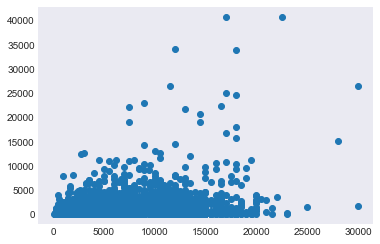

In [46]:

plt.scatter(cred['CREDIT_LIMIT'],cred['ONEOFF_PURCHASES'])

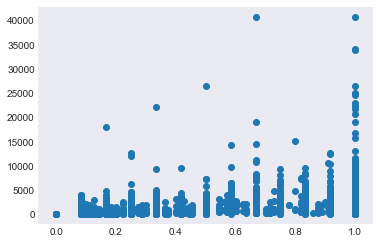

In [47]:

plt.scatter(cred['ONEOFF_PURCHASES_FREQUENCY'],cred['ONEOFF_PURCHASES'])

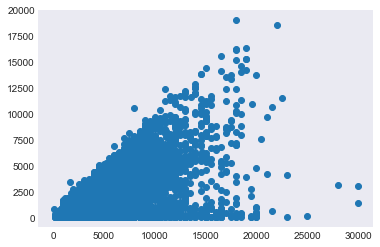

In [48]:
plt.scatter(cred['CREDIT_LIMIT'],cred['BALANCE'])

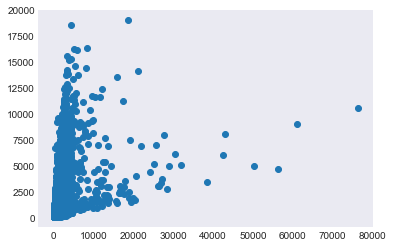

In [49]:
plt.scatter(cred['MINIMUM_PAYMENTS'],cred['BALANCE'])

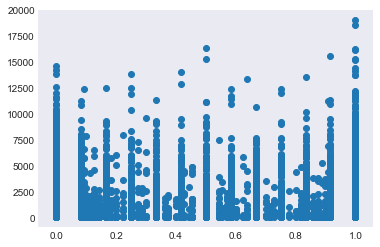

In [50]:
plt.scatter(cred['PURCHASES_FREQUENCY'],cred['BALANCE'])

---
### K-Mean for CreditLimit and Balance

In [80]:
credk.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,Customer_Size
0,40.900749,95.40,0.00,0.083333,0.000000,1000,201.802084,139.509787,1
1,3202.467416,0.00,0.00,0.000000,0.250000,7000,4103.032597,1072.340217,1
2,2495.148862,773.17,773.17,0.000000,0.000000,7500,622.066742,627.284787,1
3,1666.670542,1499.00,1499.00,0.000000,0.083333,7500,0.000000,913.155148,1
4,817.714335,16.00,16.00,0.000000,0.000000,1200,678.334763,244.791237,1


In [96]:
X = credk.drop(['CREDIT_LIMIT','BALANCE'], axis=1)
X.head()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PAYMENTS,MINIMUM_PAYMENTS,Customer_Size
0,95.40,0.00,0.083333,0.000000,201.802084,139.509787,1
1,0.00,0.00,0.000000,0.250000,4103.032597,1072.340217,1
2,773.17,773.17,0.000000,0.000000,622.066742,627.284787,1
3,1499.00,1499.00,0.000000,0.083333,0.000000,913.155148,1
4,16.00,16.00,0.000000,0.000000,678.334763,244.791237,1


In [97]:
Y = credk['BALANCE'].copy()
Y.head()

0      40.900749
1    3202.467416
2    2495.148862
3    1666.670542
4     817.714335
Name: BALANCE, dtype: float64

In [98]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [99]:
print(kmeans.cluster_centers_)

[[6.41307689e+02 3.37234201e+02 3.47236149e-01 1.30307176e-01
  1.08995311e+03 6.55352408e+02 1.13893356e+00]
 [1.09013603e+03 1.72981379e+02 4.48928966e-01 1.19252828e-01
  1.92231901e+03 2.25446916e+04 1.17241379e+00]
 [2.72763638e+04 2.18771029e+04 7.20833292e-01 5.90277500e-02
  2.79256345e+04 3.26667104e+03 2.58333333e+00]
 [3.91991413e+03 2.60046755e+03 5.24415964e-01 1.88451418e-01
  7.54119336e+03 1.31860793e+03 1.56560510e+00]]


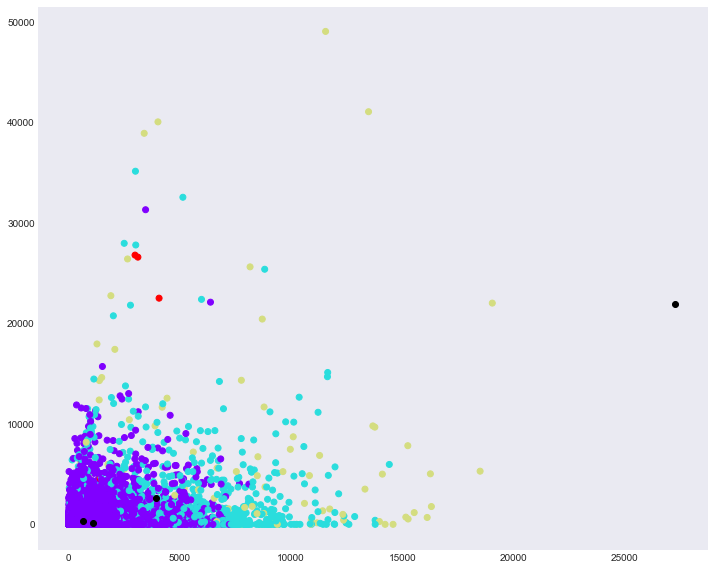

In [143]:
plt.figure(figsize=(12,10))
plt.scatter(credk['BALANCE'],credk['PURCHASES'], c=credk['Customer_Size'], 
            cmap='rainbow')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black')
#plt.savefig("credit-scatter.png")

---
---
## Well...
Not sure I did it right--I could not get any K-Means to actually "cluster" beyond the far-left margin of the plot. The data has huge variance, while also being incredibly bottom-heavy, and filtering was unsuccessful (the ways I tried it at least). 

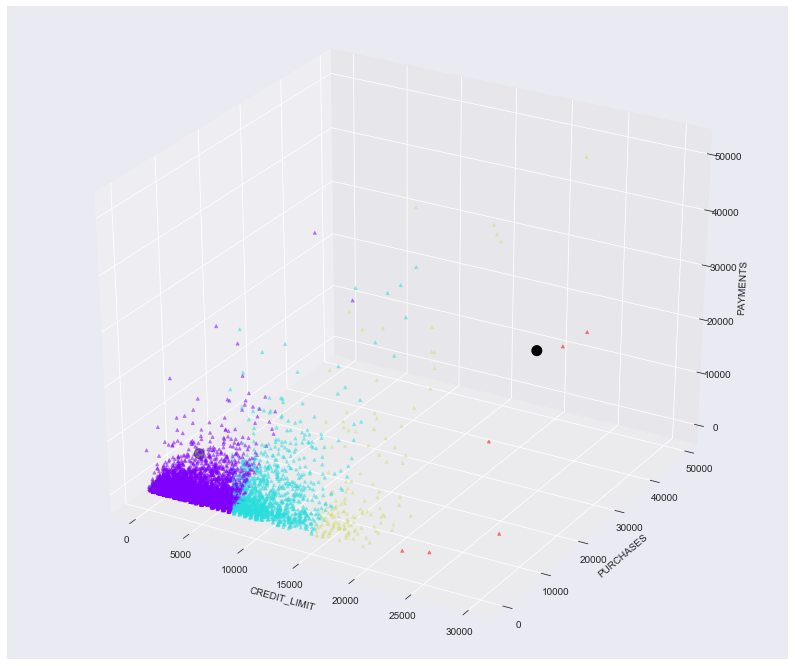

In [142]:

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')


# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
xs = credk['CREDIT_LIMIT']
ys = credk['PURCHASES']
zs = credk['PAYMENTS']
ax.scatter(xs, ys, zs, s=9, marker='^',
           c=credk['Customer_Size'],cmap='rainbow', alpha=0.4)

ax.set_xlabel('CREDIT_LIMIT')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('PAYMENTS')

ax.scatter(kmeans.cluster_centers_[:,0],
           kmeans.cluster_centers_[:,1],
           kmeans.cluster_centers_[:,4], c='black', s=100)

fig.savefig("3d_credit.png")